In [2]:
import csv
csv.field_size_limit(2000 * 1024 * 1024)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import ast

In [3]:
prev= '../../../snellius/Scripts/synthetic/FAL/Results/'
dataset = 'Synthetic'
strategy = 'FAL_total_LG_'
strategy_name = 'FAL'
baseline_acc = 0.832
baseline_unf = 0.128
baselines_unf = [0.034, 0.023, 0.645, 0.034]
baselines_acc = [0.847, 0.837, 0.811, 0.82]
# selected_groups = [5,1,2]
max_sampling = 100

In [4]:
# Create an empty list to store the dictionary entries
data_dict_list = []

types = ['accuracy_histories_profiles', 'accuracy_histories_total', 'fairness_histories_profiles', 'fairness_histories_total']

# types = ['accuracy_histories_total', 'fairness_histories_total']


accuracy_histories_profiles = {}
accuracy_histories_total = {}
fairness_histories_profiles = {}
fairness_histories_total = {}

numbers = [327, 57, 12, 379, 140, 125, 114, 71, 377, 52, 346, 279, 44, 302, 216, 16, 15, 47, 111, 119, 258, 308, 13, 287, 101, 366, 332, 359, 214, 112]
missing_number = [71, 16, 308]
numbers = [number for number in numbers if number not in missing_number]
for typ in types:
    for number in numbers:
        # Open the CSV file for reading
        file = prev + dataset + strategy + str(number) + 'experiments_' + typ + '_4profiles100iter_.csv' 


        with open(file, mode='r') as file:
            # Create a CSV reader
            csv_reader = csv.DictReader(file)

            # Iterate over the rows in the CSV file
            for row in csv_reader:
                if typ == 'accuracy_histories_profiles':
#                     print(row)
                    for profile in dict(row):
                        if profile not in accuracy_histories_profiles:
                            accuracy_histories_profiles[profile] = {}
#                         print(row[profile])
                        runs = ast.literal_eval(row[profile])
                        for run_number in runs:
                            if run_number not in accuracy_histories_profiles[profile]:
                                accuracy_histories_profiles[profile][run_number] = []
                            accuracy_histories_profiles[profile][run_number].append(runs[run_number][0])

                if typ == 'accuracy_histories_total':
                    for key in dict(row):
                        if key not in accuracy_histories_total:
                            accuracy_histories_total[key] = []
                        cleaned_string = row[key].strip('[]')
                        float_value = float(cleaned_string)
                        accuracy_histories_total[key].append(float_value)
                        
                if typ == 'fairness_histories_profiles':
                    for profile in dict(row):
                        if profile not in fairness_histories_profiles:
                            fairness_histories_profiles[profile] = {}
#                         print(row[profile])
                        runs = ast.literal_eval(row[profile])
                        for run_number in runs:
                            if run_number not in fairness_histories_profiles[profile]:
                                fairness_histories_profiles[profile][run_number] = []
                            fairness_histories_profiles[profile][run_number].append(runs[run_number][0])

                if typ == 'fairness_histories_total':
#                     print(row)
                    for key in dict(row):
                        if key not in fairness_histories_total:
                            fairness_histories_total[key] = []
                        cleaned_string = row[key].strip('[]')
                        float_value = float(cleaned_string)
                        fairness_histories_total[key].append(float_value)

In [5]:
mean_acc_dict = {}
for key, value in accuracy_histories_total.items():
    mean = np.mean(value)
    mean_acc_dict[key] = mean

mean_unf_dict = {}
for key, value in fairness_histories_total.items():
    mean = np.mean(value)
    mean_unf_dict[key] = mean
    
mean_acc_dict_profiles = {}
for profile, iteration in accuracy_histories_profiles.items():
    mean_acc_dict_profiles[profile] = []
    for iteration in accuracy_histories_profiles[profile]:
        mean_acc_dict_profiles[profile].append(np.mean(accuracy_histories_profiles[profile][iteration]))

mean_unf_dict_profiles = {}
for profile, iteration in fairness_histories_profiles.items():
    mean_unf_dict_profiles[profile] = []
    for iteration in accuracy_histories_profiles[profile]:
        mean_unf_dict_profiles[profile].append(np.mean(fairness_histories_profiles[profile][iteration]))

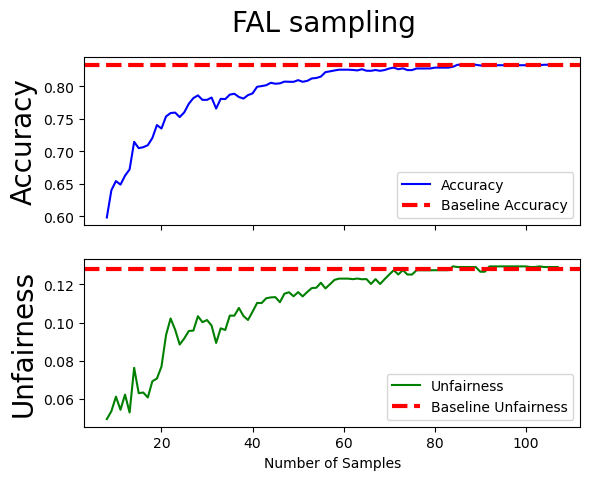

<Figure size 1000x800 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

# Sample data (replace these with your actual data)
number_of_samples = [i for i in range(8, 208)]
accuracy_values = list(mean_acc_dict.values())
unfairness_values = list(mean_unf_dict.values())

# Create a figure with two subplots sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle(strategy_name + ' sampling', fontsize=20)
plt.figure(figsize=(10, 8))  # Enlarge the figure size


# Plot accuracy on the first subplot (ax1)
ax1.plot(number_of_samples[:max_sampling], accuracy_values[:max_sampling], label='Accuracy', color='b', linestyle='-')
ax1.axhline(y=baseline_acc, linestyle='--', color='r', linewidth=3, label='Baseline Accuracy')  # Dotted red line
ax1.set_ylabel('Accuracy', fontsize=20)
# ax1.set_ylim(0.73, 0.87)
ax1.legend()

# Plot unfairness on the second subplot (ax2)
ax2.plot(number_of_samples[:max_sampling], unfairness_values[:max_sampling], color='g', label='Unfairness', linestyle='-')
ax2.axhline(y=baseline_unf, linestyle='--', color='r', linewidth=3, label='Baseline Unfairness')  # Dotted red line
ax2.set_xlabel('Number of Samples')
ax2.set_ylabel('Unfairness', fontsize=20)
# ax2.set_ylim(0.1, 0.3)
ax2.legend()

# Show the plot
plt.show()

# Plot the subgroups: Accuracy

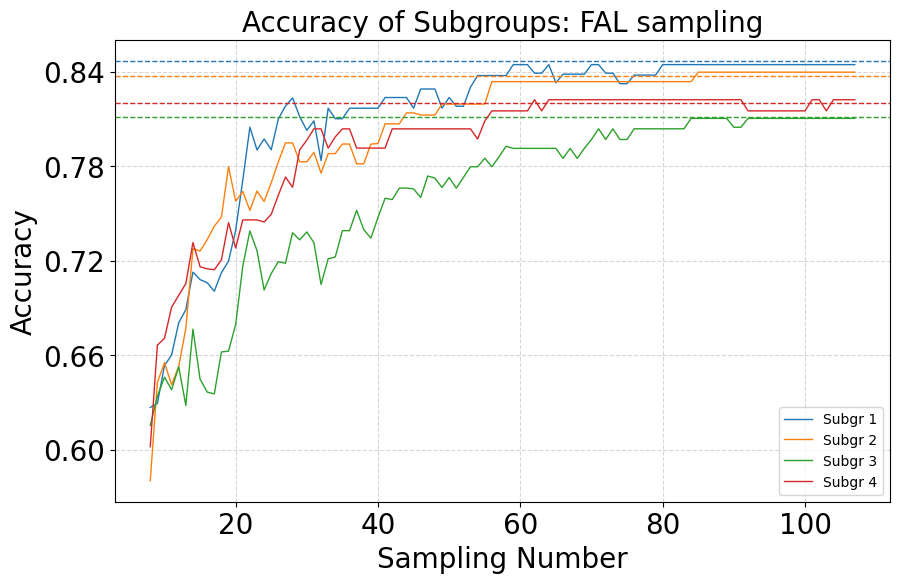

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Sample data (replace these with your actual data)
sample_numbers = [i for i in range(8, max_sampling+8)]
accuracies_dict_profiles = mean_acc_dict_profiles  # Replace with your actual data

# Create a plot with improved styling
plt.figure(figsize=(10, 6))  # Enlarge the figure size

# Plot accuracies for each profile
for profile, accuracies in accuracies_dict_profiles.items():
    profile_color = next(ax._get_lines.prop_cycler)['color']  # Get the next color from the default color cycle
    plt.plot(sample_numbers[:max_sampling], accuracies[:max_sampling], linestyle='-', linewidth=1, label='Subgr ' + profile, color=profile_color)
    plt.axhline(y=baselines_acc[int(profile)-1], color=profile_color, linestyle='--', linewidth=1)  # Dotted red line


# Add labels and legend
plt.xlabel('Sampling Number', fontsize=20)  # Increase the font size
plt.ylabel('Accuracy', fontsize=20)  # Increase the font size
plt.title('Accuracy of Subgroups: '+strategy_name+ ' sampling', fontsize=20)  # Increase the title font size

# Configure the y-axis ticker for better spacing and formatting
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(prune='both'))  # Prune small ticks

# Set the y-limits to your desired range
# plt.ylim(0.6, 1.0)

# Customize tick labels and font size
plt.xticks(fontsize=20)  # Increase x-axis tick label font size
plt.yticks(fontsize=20)  # Increase y-axis tick label font size
plt.locator_params(axis='y', nbins=5)  # Adjust the number of y-axis ticks as needed

# Add a legend with increased font size
plt.legend(fontsize=10, loc='lower right')  # Increase the legend font size

# Set a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

# Plot the subgroups: Unfairness

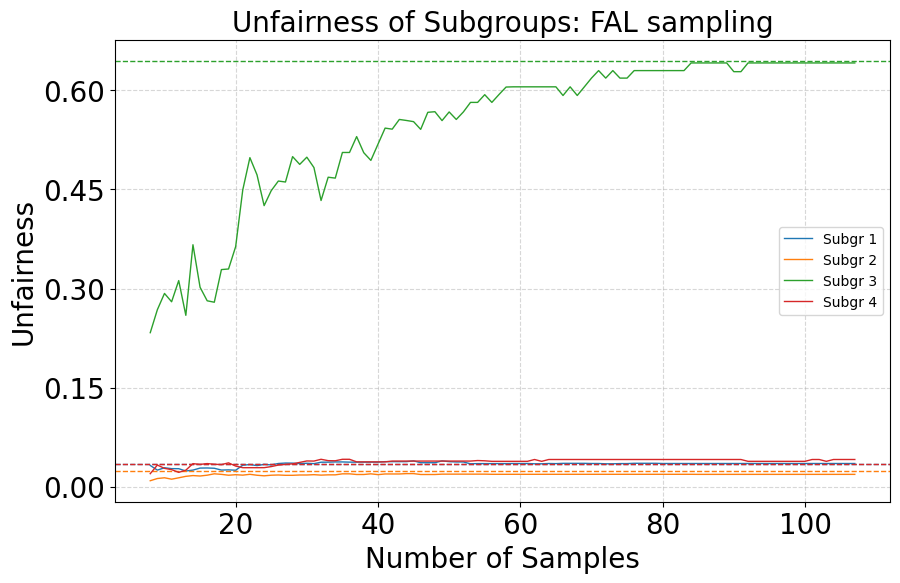

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Sample data (replace these with your actual data)
sample_numbers = [i for i in range(8, max_sampling+8)]
unf_dict_profiles = mean_unf_dict_profiles  # Replace with your actual data

# Create a plot with improved styling
plt.figure(figsize=(10, 6))  # Enlarge the figure size

# Plot accuracies for each profile
for profile, accuracies in unf_dict_profiles.items():
    profile_color = next(ax._get_lines.prop_cycler)['color']  # Get the next color from the default color cycle
    plt.plot(sample_numbers[:max_sampling], accuracies[:max_sampling], linestyle='-', linewidth=1, label='Subgr ' + profile, color=profile_color)
    plt.axhline(y=baselines_unf[int(profile)-1], color=profile_color, linestyle='--', linewidth=1,)  # Dotted red line


# Add labels and legend
plt.xlabel('Number of Samples', fontsize=20)  # Increase the font size
plt.ylabel('Unfairness', fontsize=20)  # Increase the font size
plt.title('Unfairness of Subgroups: '+strategy_name+ ' sampling', fontsize=20)  # Increase the title font size

# Configure the y-axis ticker for better spacing and formatting
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(prune='both'))  # Prune small ticks

# Set the y-limits to your desired range
# plt.ylim(0.6, 1.0)

# Customize tick labels and font size
plt.xticks(fontsize=20)  # Increase x-axis tick label font size
plt.yticks(fontsize=20)  # Increase y-axis tick label font size
plt.locator_params(axis='y', nbins=5)  # Adjust the number of y-axis ticks as needed

# Add a legend with increased font size
plt.legend(fontsize=10, loc='right')  # Increase the legend font size

# Set a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()